<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/MERGED_ALL_MODELS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Packages Installing



In [1]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 3.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


Errors calculating fuction
* Mean Absolute Percentage Error
* Mean Error
* Mean Absolute Error
* Mean Percentage Error
* Root Mean Square Error

In [2]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE 
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, })

Packages Importing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import xgboost as xg

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Loading

In [4]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

<h1>Forecasting with ARIMA</h1>

*GROUPING THE DATA AND FILLING THE EMPTY VALUES BY MEDIAN*

In [5]:
data_arima = data[['Ship Date','Sales']]
data_arima = data_arima.groupby('Ship Date').sum()
data_arima = data_arima.resample('MS').median()
data_arima.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


Normalization with min logic

In [6]:
data_arima['Sales'] = data_arima['Sales']/min(data_arima['Sales'])

*Data  line PLOT*

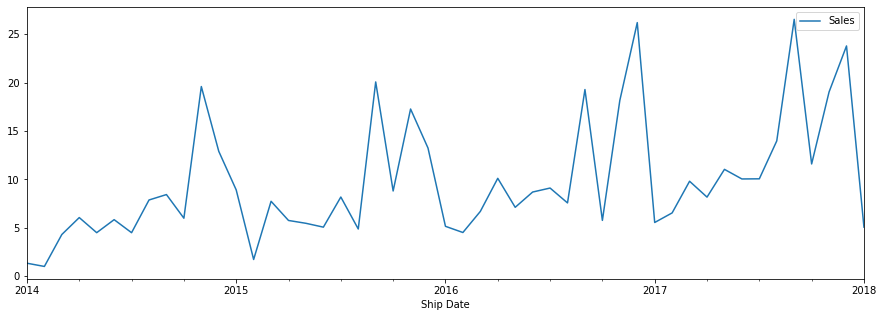

In [7]:
data_arima.plot(figsize=(15,5))
plt.show()

*INTIALING THE HYPER PARAMETERS*

In [8]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [9]:
seasons = 12
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

*APPLYING GRID SEARCH AND LOOPING OVER MODELS  TO FIND BETTER HYPERPARAMETERS *

In [10]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model_arima = sm.tsa.statespace.SARIMAX(data_arima, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model_arima.fit()
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
**** Smallest PDQ,SPDQ is *****
127.11442363600139
(1, 1, 1)
(1, 1, 0, 12)


*HERE THE MODEL BULIDING AND FITTING*

In [11]:
model_arima = sm.tsa.statespace.SARIMAX(data_arima, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
results_arima = model_arima.fit()

In [12]:
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                 -59.557
Date:                            Sat, 18 Jun 2022   AIC                            127.114
Time:                                    13:13:02   BIC                            131.656
Sample:                                01-01-2014   HQIC                           128.257
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4363      0.263     -1.658      0.097      -0.952       0.079
ma.L1         -0.9436      0.290     -3.250      0.001      -1.513      -0.375
ar.S.L12      -0.6368      0.199     -3.206      0.001      -1.026      -0.247
sigma2         9.5923      2.882      3.329      0.001       3.945      15.240
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 5.26
Prob(Q):                               nan   Prob(JB):                         0.07
Heteroskedasticity (H):               3.49   Skew:                             0.98
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*HERE THE PREDICTIONS*

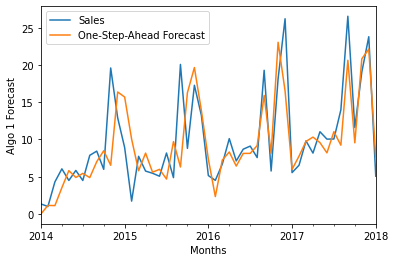

In [13]:
pred = results_arima.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data_arima['2014':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()

Calculating the error

In [14]:
arr = data_arima['Sales'].values
ac = pred.predicted_mean.values

In [15]:
forecast_accuracy(ac,arr)

{'mae': 2.9545745541856703,
 'mape': 0.40265798936023695,
 'me': -0.37951624544122137,
 'mpe': 0.09628837039933469,
 'rmse': 4.223695163446492}

Future prediction (20 days)

In [16]:
data2_arima = data_arima.copy()
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,21)]
future_prediction = pd.DataFrame(index=date_list, columns= data_arima.columns)
data2_arima = pd.concat([data2_arima, future_prediction])

In [17]:
data2_arima

,Sales
2014-01-01,1.333944
2014-02-01,1.000000
2014-03-01,4.301590
2014-04-01,6.051472
2014-05-01,4.490913
...,...
2019-05-01,NaN
2019-06-01,NaN
2019-07-01,NaN
2019-08-01,NaN


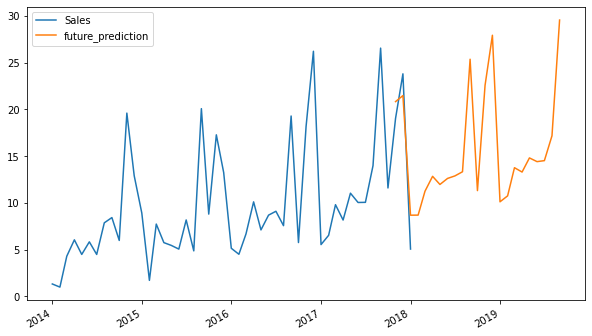

In [18]:
data2_arima['future_prediction']=results_arima.predict(start=46, end=71 ,dynamic=True)
data2_arima[['Sales','future_prediction']].plot(figsize=(10, 6))
plt.show()

In [19]:
data2_arima.tail(20)

,Sales,future_prediction
2018-02-01,NaN,8.693579
2018-03-01,NaN,11.245522
2018-04-01,NaN,12.839374
2018-05-01,NaN,11.968523
2018-06-01,NaN,12.615123
2018-07-01,NaN,12.882561
2018-08-01,NaN,13.327140
2018-09-01,NaN,25.353270
2018-10-01,NaN,11.312223
2018-11-01,NaN,22.561998


<h1>Forecasting with LSTM</h1>

Data Preparation

In [20]:
data_lstm = data[['Ship Date','Sales']]
data_lstm = data_lstm.groupby('Ship Date').sum()
data_lstm = data_lstm.resample('MS').median()
data_lstm.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [21]:
num_lstm = data_lstm.values

Normalization with min concept

In [22]:
num1_lstm = num_lstm/min(num_lstm)
num1_lstm

array([[ 1.33394419],
       [ 1.        ],
       [ 4.3015897 ],
       [ 6.05147183],
       [ 4.49091281],
       [ 5.83631495],
       [ 4.48876   ],
       [ 7.86992376],
       [ 8.43020701],
       [ 5.9868963 ],
       [19.59643184],
       [12.90169112],
       [ 8.91275765],
       [ 1.71976052],
       [ 7.73563975],
       [ 5.7530046 ],
       [ 5.45941234],
       [ 5.06175552],
       [ 8.17637954],
       [ 4.87140938],
       [20.07292881],
       [ 8.80189661],
       [17.27444823],
       [13.23658717],
       [ 5.14900677],
       [ 4.50911388],
       [ 6.68817553],
       [10.10991807],
       [ 7.11310281],
       [ 8.69147148],
       [ 9.10441149],
       [ 7.56666163],
       [19.28581722],
       [ 5.76150021],
       [18.16295113],
       [26.20554038],
       [ 5.54403484],
       [ 6.53475194],
       [ 9.80712742],
       [ 8.16737686],
       [11.03626869],
       [10.04383913],
       [10.05861526],
       [13.97736876],
       [26.54211776],
       [11

Function to generate a window of numbers which goes as input to the model

* [n1,n2.n3] --> input 
* n4 --> output

In [23]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		end_ix = i + n_features
		if end_ix > len(timeseries_data)-1:
			break
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

Generating the window

In [24]:
n_steps = 3
X_lstm, y_lstm = prepare_data(num1_lstm, n_steps)

In [25]:
print(X_lstm),print(y_lstm)

[[[ 1.33394419]
  [ 1.        ]
  [ 4.3015897 ]]

 [[ 1.        ]
  [ 4.3015897 ]
  [ 6.05147183]]

 [[ 4.3015897 ]
  [ 6.05147183]
  [ 4.49091281]]

 [[ 6.05147183]
  [ 4.49091281]
  [ 5.83631495]]

 [[ 4.49091281]
  [ 5.83631495]
  [ 4.48876   ]]

 [[ 5.83631495]
  [ 4.48876   ]
  [ 7.86992376]]

 [[ 4.48876   ]
  [ 7.86992376]
  [ 8.43020701]]

 [[ 7.86992376]
  [ 8.43020701]
  [ 5.9868963 ]]

 [[ 8.43020701]
  [ 5.9868963 ]
  [19.59643184]]

 [[ 5.9868963 ]
  [19.59643184]
  [12.90169112]]

 [[19.59643184]
  [12.90169112]
  [ 8.91275765]]

 [[12.90169112]
  [ 8.91275765]
  [ 1.71976052]]

 [[ 8.91275765]
  [ 1.71976052]
  [ 7.73563975]]

 [[ 1.71976052]
  [ 7.73563975]
  [ 5.7530046 ]]

 [[ 7.73563975]
  [ 5.7530046 ]
  [ 5.45941234]]

 [[ 5.7530046 ]
  [ 5.45941234]
  [ 5.06175552]]

 [[ 5.45941234]
  [ 5.06175552]
  [ 8.17637954]]

 [[ 5.06175552]
  [ 8.17637954]
  [ 4.87140938]]

 [[ 8.17637954]
  [ 4.87140938]
  [20.07292881]]

 [[ 4.87140938]
  [20.07292881]
  [ 8.80189661]]



(None, None)

Reshaping the data 
(three dimensional)

In [26]:
n_features = 1
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], n_features))

Model buliding and training

In [27]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_lstm, y_lstm, epochs=300, verbose=1)

Epoch 1/300
2/2 [==============================] - 3s 18ms/step - loss: 143.3849
Epoch 2/300
2/2 [==============================] - 0s 12ms/step - loss: 142.0688
Epoch 3/300
2/2 [==============================] - 0s 10ms/step - loss: 140.8049
Epoch 4/300
2/2 [==============================] - 0s 10ms/step - loss: 139.5039
Epoch 5/300
2/2 [==============================] - 0s 12ms/step - loss: 137.9739
Epoch 6/300
2/2 [==============================] - 0s 12ms/step - loss: 136.3788
Epoch 7/300
2/2 [==============================] - 0s 10ms/step - loss: 134.5567
Epoch 8/300
2/2 [==============================] - 0s 11ms/step - loss: 132.3414
Epoch 9/300
2/2 [==============================] - 0s 11ms/step - loss: 129.8986
Epoch 10/300
2/2 [==============================] - 0s 10ms/step - loss: 126.5204
Epoch 11/300
2/2 [==============================] - 0s 12ms/step - loss: 122.7690
Epoch 12/300
2/2 [==============================] - 0s 12ms/step - loss: 118.6904
Epoch 13/300
2/2 [=======

Prediction of existing values

In [28]:
y_pred_lstm = model_lstm.predict(X_lstm)
y_plot_pred_lstm = y_pred_lstm.reshape(y_pred_lstm.shape[0])
y_plot_pred_lstm.shape

(46,)

In [29]:
y_plot_present_lstm = y_lstm.reshape(y_lstm.shape[0])
y_plot_present_lstm

array([ 6.05147183,  4.49091281,  5.83631495,  4.48876   ,  7.86992376,
        8.43020701,  5.9868963 , 19.59643184, 12.90169112,  8.91275765,
        1.71976052,  7.73563975,  5.7530046 ,  5.45941234,  5.06175552,
        8.17637954,  4.87140938, 20.07292881,  8.80189661, 17.27444823,
       13.23658717,  5.14900677,  4.50911388,  6.68817553, 10.10991807,
        7.11310281,  8.69147148,  9.10441149,  7.56666163, 19.28581722,
        5.76150021, 18.16295113, 26.20554038,  5.54403484,  6.53475194,
        9.80712742,  8.16737686, 11.03626869, 10.04383913, 10.05861526,
       13.97736876, 26.54211776, 11.59498626, 19.03944454, 23.79368567,
        5.06421969])

the plot of model on data

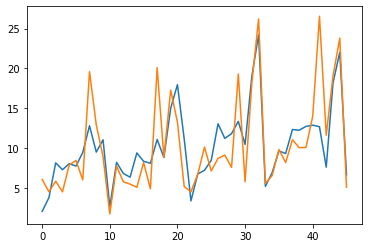

In [30]:
plt.plot(y_plot_pred_lstm)
plt.plot(y_plot_present_lstm)
plt.show()

generating the future prediction

In [31]:
l_lstm = []
for i in num1_lstm[-3:]:
  for j in i:
    l_lstm.append(j)

In [32]:
x_input_lstm = np.array(l_lstm)
temp_input_lstm=list(x_input_lstm)
lst_output_lstm=[]
i=0
while(i<20):
    
    if(len(temp_input_lstm)>3):
        x_input_lstm=np.array(temp_input_lstm[1:])
        print("{} day input {}".format(i,x_input_lstm))
        x_input_lstm = x_input_lstm.reshape((1, n_steps, n_features))
        yhat_lstm = model_lstm.predict(x_input_lstm, verbose=0)
        print("{} day output {}".format(i,yhat_lstm))
        temp_input_lstm.append(yhat_lstm[0][0])
        temp_input_lstm=temp_input_lstm[1:]
        lst_output_lstm.append(yhat_lstm[0][0])
        i=i+1
    else:
        x_input_lstm = x_input_lstm.reshape((1, n_steps, n_features))
        yhat_lstm = model_lstm.predict(x_input_lstm, verbose=0)
        print(yhat_lstm[0])
        temp_input_lstm.append(yhat_lstm[0][0])
        lst_output_lstm.append(yhat_lstm[0][0])
        i=i+1
    

print(lst_output_lstm)

[3.0791526]
1 day input [23.79368567  5.06421969  3.07915258]
1 day output [[6.4633207]]
2 day input [5.06421969 3.07915258 6.46332073]
2 day output [[5.788712]]
3 day input [3.0791526 6.4633207 5.788712 ]
3 day output [[7.351319]]
4 day input [6.4633207 5.788712  7.351319 ]
4 day output [[9.062919]]
5 day input [5.788712 7.351319 9.062919]
5 day output [[10.144855]]
6 day input [ 7.351319  9.062919 10.144855]
6 day output [[12.040603]]
7 day input [ 9.062919 10.144855 12.040603]
7 day output [[12.602695]]
8 day input [10.144855 12.040603 12.602695]
8 day output [[12.521772]]
9 day input [12.040603 12.602695 12.521772]
9 day output [[12.12351]]
10 day input [12.602695 12.521772 12.12351 ]
10 day output [[11.900086]]
11 day input [12.521772 12.12351  11.900086]
11 day output [[11.996375]]
12 day input [12.12351  11.900086 11.996375]
12 day output [[12.206756]]
13 day input [11.900086 11.996375 12.206756]
13 day output [[12.276006]]
14 day input [11.996375 12.206756 12.276006]
14 day out

Merging the data prediction and future prediction

In [33]:
l2_lstm = []
for i in y_plot_pred_lstm:
  l2_lstm.append(i)
print(l2_lstm)

[2.0418491, 3.763698, 8.13073, 7.271722, 8.024722, 7.7295594, 9.438756, 12.791359, 9.486391, 11.028235, 2.6206253, 8.195791, 6.797351, 6.3328257, 9.37774, 8.323857, 8.0839405, 11.066071, 8.80492, 14.985172, 17.95626, 11.120548, 3.3549023, 6.741272, 7.193091, 8.451723, 13.039675, 11.204195, 11.797979, 13.344876, 10.44486, 19.00315, 24.200752, 5.1826663, 6.900378, 9.631315, 9.303436, 12.318289, 12.234115, 12.707474, 12.861305, 12.668665, 7.588973, 18.160873, 22.01368, 6.6287446]


In [34]:
for i in lst_output_lstm:
  l2_lstm.append(i)

plot of data and merged prediction

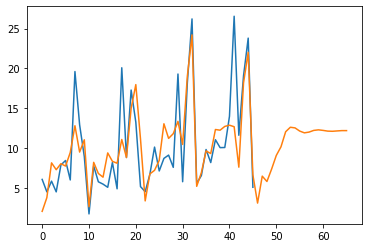

In [35]:
plt.plot(y_plot_present_lstm)
plt.plot(l2_lstm)
plt.show()

In [36]:
date_lstm = pd.date_range(start='2018-02-01',end='2019-09-01', freq='MS')
lst_output_data_lstm = lst_output_lstm*min(num_lstm)

here the future predictions

In [37]:
data3_lstm = pd.DataFrame(date_lstm,lst_output_lstm*min(num_lstm))
data3_lstm

,0
346.130621,2018-02-01
726.548347,2018-03-01
650.714907,2018-04-01
826.369102,2018-05-01
1018.771750,2018-06-01
1140.393244,2018-07-01
1353.496188,2018-08-01
1416.681600,2018-09-01
1407.584956,2018-10-01
1362.815923,2018-11-01


<h1>Forecasting with XGBOOST</h1>

Data Preparation

In [38]:
data_xg = data[['Ship Date','Sales']]
data_xg = data_xg.groupby('Ship Date').sum()
data_xg = data_xg.resample('MS').median()
data_xg.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [39]:
num_xg = data_xg.values

Normalization with min logic

In [40]:
num1_xg = num_xg/min(num_xg)
num1_xg

array([[ 1.33394419],
       [ 1.        ],
       [ 4.3015897 ],
       [ 6.05147183],
       [ 4.49091281],
       [ 5.83631495],
       [ 4.48876   ],
       [ 7.86992376],
       [ 8.43020701],
       [ 5.9868963 ],
       [19.59643184],
       [12.90169112],
       [ 8.91275765],
       [ 1.71976052],
       [ 7.73563975],
       [ 5.7530046 ],
       [ 5.45941234],
       [ 5.06175552],
       [ 8.17637954],
       [ 4.87140938],
       [20.07292881],
       [ 8.80189661],
       [17.27444823],
       [13.23658717],
       [ 5.14900677],
       [ 4.50911388],
       [ 6.68817553],
       [10.10991807],
       [ 7.11310281],
       [ 8.69147148],
       [ 9.10441149],
       [ 7.56666163],
       [19.28581722],
       [ 5.76150021],
       [18.16295113],
       [26.20554038],
       [ 5.54403484],
       [ 6.53475194],
       [ 9.80712742],
       [ 8.16737686],
       [11.03626869],
       [10.04383913],
       [10.05861526],
       [13.97736876],
       [26.54211776],
       [11

Function to generate a window of numbers which goes as input to the model

* [n1,n2.n3] --> input 
* n4 --> output

In [41]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		end_ix = i + n_features
		if end_ix > len(timeseries_data)-1:
			break
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

generating the window

In [42]:
n_steps = 3
X_xg, y_xg = prepare_data(num1_xg, n_steps)

In [43]:
print(X_xg),print(y_xg)

[[[ 1.33394419]
  [ 1.        ]
  [ 4.3015897 ]]

 [[ 1.        ]
  [ 4.3015897 ]
  [ 6.05147183]]

 [[ 4.3015897 ]
  [ 6.05147183]
  [ 4.49091281]]

 [[ 6.05147183]
  [ 4.49091281]
  [ 5.83631495]]

 [[ 4.49091281]
  [ 5.83631495]
  [ 4.48876   ]]

 [[ 5.83631495]
  [ 4.48876   ]
  [ 7.86992376]]

 [[ 4.48876   ]
  [ 7.86992376]
  [ 8.43020701]]

 [[ 7.86992376]
  [ 8.43020701]
  [ 5.9868963 ]]

 [[ 8.43020701]
  [ 5.9868963 ]
  [19.59643184]]

 [[ 5.9868963 ]
  [19.59643184]
  [12.90169112]]

 [[19.59643184]
  [12.90169112]
  [ 8.91275765]]

 [[12.90169112]
  [ 8.91275765]
  [ 1.71976052]]

 [[ 8.91275765]
  [ 1.71976052]
  [ 7.73563975]]

 [[ 1.71976052]
  [ 7.73563975]
  [ 5.7530046 ]]

 [[ 7.73563975]
  [ 5.7530046 ]
  [ 5.45941234]]

 [[ 5.7530046 ]
  [ 5.45941234]
  [ 5.06175552]]

 [[ 5.45941234]
  [ 5.06175552]
  [ 8.17637954]]

 [[ 5.06175552]
  [ 8.17637954]
  [ 4.87140938]]

 [[ 8.17637954]
  [ 4.87140938]
  [20.07292881]]

 [[ 4.87140938]
  [20.07292881]
  [ 8.80189661]]



(None, None)

reshaping the data

In [44]:
X_xg = X_xg.reshape((X_xg.shape[0], X_xg.shape[1]))
y_xg = y_xg.reshape(y_xg.shape[0])

Model buliding and training

In [45]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

In [46]:
xgb_r.fit(X_xg, y_xg)

[13:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=123)

Prediction on data

In [47]:
y_pred_xg = xgb_r.predict(X_xg)

ploting the data and predicted data

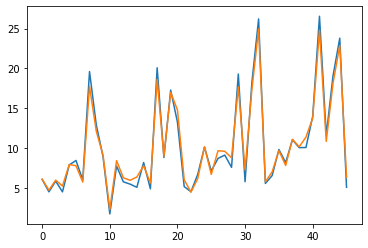

In [48]:
plt.plot(y_xg)
plt.plot(y_pred_xg)
plt.show()

Metrics finding

In [49]:
forecast_accuracy(y_pred_xg,y_xg)

{'mae': 0.6810354720454652,
 'mape': 0.08009794609755747,
 'me': 0.00017894574120746537,
 'mpe': 0.03456499804466155,
 'rmse': 0.8564860845417669}

making the future predictions

In [50]:
l_xg = []
for i in num1_xg[-3:]:
  for j in i:
    l_xg.append(j)

In [51]:
l_xg

[19.039444538345894, 23.793685671331094, 5.064219693802208]

In [52]:
x_input_xg = np.array(l_xg)
temp_input_xg=list(x_input_xg)
lst_output_xg=[]
i=0
while(i<20):
    
    if(len(temp_input_xg)>3):
        x_input_xg=np.array(temp_input_xg[1:])
        print("{} day input {}".format(i,x_input_xg))
        x_input_xg = x_input_xg.reshape(1,3)
        yhat_xg = xgb_r.predict(x_input_xg)
        print("{} day output {}".format(i,yhat_xg))
        temp_input_xg.append(yhat_xg[0])
        temp_input_xg=temp_input_xg[1:]
        lst_output_xg.append(yhat_xg[0])
        i=i+1
    else:
        x_input_xg = x_input_xg.reshape(1,3)
        yhat_xg = xgb_r.predict(x_input_xg)
        print(yhat_xg[0])
        temp_input_xg.append(yhat_xg[0])
        lst_output_xg.append(yhat_xg[0])
        i=i+1
    

print(lst_output_xg)

8.496529
1 day input [23.79368567  5.06421969  8.49652863]
1 day output [7.443159]
2 day input [5.06421969 8.49652863 7.4431591 ]
2 day output [18.544426]
3 day input [ 8.496529  7.443159 18.544426]
3 day output [21.716692]
4 day input [ 7.443159 18.544426 21.716692]
4 day output [7.2125797]
5 day input [18.544426  21.716692   7.2125797]
5 day output [9.636567]
6 day input [21.716692   7.2125797  9.636567 ]
6 day output [7.0302806]
7 day input [7.2125797 9.636567  7.0302806]
7 day output [12.165063]
8 day input [ 9.636567   7.0302806 12.165063 ]
8 day output [11.6622095]
9 day input [ 7.0302806 12.165063  11.6622095]
9 day output [6.938306]
10 day input [12.165063  11.6622095  6.938306 ]
10 day output [10.40269]
11 day input [11.6622095  6.938306  10.40269  ]
11 day output [9.73619]
12 day input [ 6.938306 10.40269   9.73619 ]
12 day output [7.6470613]
13 day input [10.40269    9.73619    7.6470613]
13 day output [15.205476]
14 day input [ 9.73619    7.6470613 15.205476 ]
14 day output

Appending the predicted data with future predicted data

In [53]:
l2_xg = []
for i in y_pred_xg:
  l2_xg.append(i)
print(l2_xg)

[6.087861, 4.702067, 5.9602304, 5.21722, 7.915592, 7.774254, 5.7204027, 17.715523, 12.118702, 9.082234, 2.270389, 8.417998, 6.2606616, 5.9412074, 6.359717, 7.7591677, 5.6020236, 18.612713, 8.953306, 16.982737, 14.775322, 6.0134473, 4.452443, 6.163789, 10.156446, 6.683559, 9.651969, 9.579707, 8.773639, 17.65734, 7.2329125, 17.263914, 24.93476, 5.7651825, 6.9930544, 9.665568, 7.8029943, 11.091879, 10.147011, 11.358931, 13.766332, 24.76202, 10.828839, 18.131838, 22.869198, 6.3122296]


In [54]:
for i in lst_output_xg:
  l2_xg.append(i)

here the plot of data merged predictions

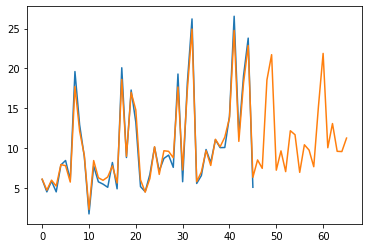

In [55]:
import matplotlib.pyplot as plt
plt.plot(y_xg)
plt.plot(l2_xg)
plt.show()

Here the prediction values

In [56]:
date_xg = pd.date_range(start='2018-02-01',end='2019-09-01', freq='MS')
lst_output_data_xg = lst_output_xg*min(num_xg)

In [57]:
data3_xg = pd.DataFrame(date_xg,lst_output_xg*min(num_xg))
data3_xg

,0
955.103279,2018-02-01
836.692958,2018-03-01
2084.597467,2018-04-01
2441.195061,2018-05-01
810.773300,2018-06-01
1083.256146,2018-07-01
790.280871,2018-08-01
1367.486886,2018-09-01
1310.960633,2018-10-01
779.941899,2018-11-01


making the metrics data frames

In [58]:
dict_arima = forecast_accuracy(ac,arr)
dict_lstm = forecast_accuracy(y_pred_lstm,y_lstm)
dict_xg = forecast_accuracy(y_pred_xg,y_xg)

In [59]:
data_m = pd.DataFrame({'Arima':pd.Series(dict_arima),'Lstm':pd.Series(dict_lstm),'Xgboost':pd.Series(dict_xg)})
data_m

,Arima,Lstm,Xgboost
mape,0.402658,0.292332,0.080098
me,-0.379516,-0.041991,0.000179
mae,2.954575,2.617229,0.681035
mpe,0.096288,0.110507,0.034565
rmse,4.223695,3.690898,0.856486


here the bar plot of metrics

(-1.0, 5.0)

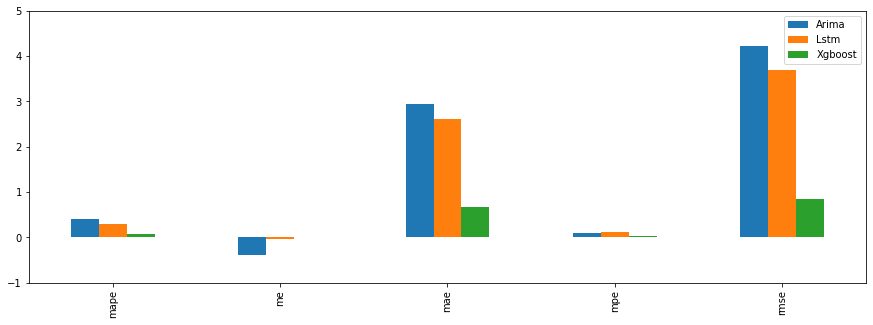

In [60]:
ax = data_m.plot(kind='bar',figsize=(15,5))
ax.set_ylim(-1,5)

dataframes of future preditions of all three models

In [61]:
data_mer_lstm= data3_lstm.reset_index()
data_mer_xg = data3_xg.reset_index()

In [62]:
data_mer_lstm = data_mer_lstm.set_index(0)
data_mer_lstm

,index
0,
2018-02-01,346.130621
2018-03-01,726.548347
2018-04-01,650.714907
2018-05-01,826.369102
2018-06-01,1018.771750
2018-07-01,1140.393244
2018-08-01,1353.496188
2018-09-01,1416.681600
2018-10-01,1407.584956


In [63]:
data_mer_xg = data_mer_xg.set_index(0)
data_mer_xg

,index
0,
2018-02-01,955.103279
2018-03-01,836.692958
2018-04-01,2084.597467
2018-05-01,2441.195061
2018-06-01,810.773300
2018-07-01,1083.256146
2018-08-01,790.280871
2018-09-01,1367.486886
2018-10-01,1310.960633


In [64]:
data_arima = data[['Ship Date','Sales']]
data_arima = data_arima.groupby('Ship Date').sum()
data_arima = data_arima.resample('MS').median()

here merged dataframe of future preditions

In [65]:
merged = data2_arima.copy()
merged['Lstm'] = data_mer_lstm
merged['xgboost'] = data_mer_xg
merged['Arima'] = merged['future_prediction']*min(data_arima['Sales'].values)
merged = merged.drop('future_prediction',axis=1)
merged = merged.drop('Sales',axis=1)
merged.tail(20)

,Lstm,xgboost,Arima
2018-02-01,346.130621,955.103279,977.253958
2018-03-01,726.548347,836.692958,1264.120396
2018-04-01,650.714907,2084.597467,1443.286816
2018-05-01,826.369102,2441.195061,1345.393602
2018-06-01,1018.771750,810.773300,1418.078625
2018-07-01,1140.393244,1083.256146,1448.141587
2018-08-01,1353.496188,790.280871,1498.117151
2018-09-01,1416.681600,1367.486886,2849.986462
2018-10-01,1407.584956,1310.960633,1271.618252
2018-11-01,1362.815923,779.941899,2536.216714


making of dataframe of  prediction on existing data by three models

In [66]:
v = min(data_arima['Sales'])

In [67]:
y_pred_xg_org = list(y_pred_xg) + lst_output_xg[0:3]
y_pred_lstm_org = list(y_pred_lstm) +lst_output_lstm[0:3]
y_pred_xg_org =  [i*v for i in y_pred_xg_org]
y_pred_lstm_org = [i*v for i in y_pred_lstm_org]

here mreged data frame

In [69]:
org = pred.predicted_mean*min(data_arima['Sales'])
org = pd.DataFrame(org)
org['Arima'] = org.values
org['Sales'] = data_arima['Sales']
org['Lstm'] = y_pred_lstm_org
org['Xgboost'] = y_pred_xg_org
org = org.drop(0,axis=1)
org

,Arima,Sales,Lstm,Xgboost
Ship Date,,,,
2014-01-01,0.000000,149.9500,[229.5263],684.342550
2014-02-01,128.141060,112.4110,[423.0811],528.564042
2014-03-01,125.563333,483.5460,[913.98346],669.995454
2014-04-01,395.956977,680.2520,[817.4216],586.472898
2014-05-01,653.498250,504.8280,[902.0671],889.799634
2014-06-01,550.476752,656.0660,[868.8875],873.911649
2014-07-01,612.018174,504.5860,[1061.02],643.036190
2014-08-01,548.356463,884.6660,[1437.8895],1991.419630
2014-09-01,788.711523,947.6480,[1066.3748],1362.275403
